In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [6]:
df = pd.read_excel("Candy Data Research.xlsx")

In [7]:
df.head()

,YEAR,MONTH,DISTRIBUTION CHANNEL,ITEM ID,ITEM,CATEGORY,BRAND,PRODUCT TYPE,PACKAGE TYPE,SALES VOLUME IN KG,SALES VOLUME in EUR,MANUFACTURER
0,2023,April,SMALL AND SPECIALTY STORES,1,CHIP & DIP PULLED PORK,CHIPS AND SNACKS,LAND CORP.,CHIPS,BAG,10.0,10.0,ROYAL BLENDS GROUP
1,2022,April,SMALL AND SPECIALTY STORES,1,CHIP & DIP PULLED PORK,CHIPS AND SNACKS,LAND CORP.,CHIPS,BAG,10.0,10.0,ROYAL BLENDS GROUP
2,2023,April,SUPERMARKET CHAINS,1,CHIP & DIP PULLED PORK,CHIPS AND SNACKS,LAND CORP.,CHIPS,BAG,10.0,10.0,ROYAL BLENDS GROUP
3,2022,April,SUPERMARKET CHAINS,1,CHIP & DIP PULLED PORK,CHIPS AND SNACKS,LAND CORP.,CHIPS,BAG,10.0,10.0,ROYAL BLENDS GROUP
4,2023,August,SMALL AND SPECIALTY STORES,1,CHIP & DIP PULLED PORK,CHIPS AND SNACKS,LAND CORP.,CHIPS,BAG,10.0,10.0,ROYAL BLENDS GROUP


## Data Cleaning

We are going to correct the text to make it more formal.

In [8]:
#This list includes all values that will not be capitalized.
exceptions = ['and', 'of', 'the', 'in', 'on', 'at', 'for', 'by', 'with', 'a', 'an', 'to']

#This function capitalizes text values in the dataframe.
def title_case_with_exceptions(text):
    words = text.lower().split()
    return ' '.join([words[0].capitalize()] +
                    [word if word in exceptions else word.capitalize() for word in words[1:]])

#We use lambda to apply the function to all values.
df = df.apply(lambda col: col.map(title_case_with_exceptions) if col.dtype == "object" else col)
df.columns = [title_case_with_exceptions(col) for col in df.columns]

In [9]:
df.columns

Index(['Year', 'Month', 'Distribution Channel', 'Item Id', 'Item', 'Category',
       'Brand', 'Product Type', 'Package Type', 'Sales Volume in Kg',
       'Sales Volume in Eur', 'Manufacturer'],
      dtype='object')

In [10]:
df.head()

,Year,Month,Distribution Channel,Item Id,Item,Category,Brand,Product Type,Package Type,Sales Volume in Kg,Sales Volume in Eur,Manufacturer
0,2023,April,Small and Specialty Stores,1,Chip & Dip Pulled Pork,Chips and Snacks,Land Corp.,Chips,Bag,10.0,10.0,Royal Blends Group
1,2022,April,Small and Specialty Stores,1,Chip & Dip Pulled Pork,Chips and Snacks,Land Corp.,Chips,Bag,10.0,10.0,Royal Blends Group
2,2023,April,Supermarket Chains,1,Chip & Dip Pulled Pork,Chips and Snacks,Land Corp.,Chips,Bag,10.0,10.0,Royal Blends Group
3,2022,April,Supermarket Chains,1,Chip & Dip Pulled Pork,Chips and Snacks,Land Corp.,Chips,Bag,10.0,10.0,Royal Blends Group
4,2023,August,Small and Specialty Stores,1,Chip & Dip Pulled Pork,Chips and Snacks,Land Corp.,Chips,Bag,10.0,10.0,Royal Blends Group


We are going to deal with null and duplicated values.

In [11]:
null_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()

print(f"Number of nulls: {null_values}")
print(f"Duplicated values: {duplicated_values}")

Number of nulls: 0
Duplicated values: 1007


We're going to drop the duplicates and show the new number of them.

In [12]:
df.drop_duplicates(inplace=True)

print(f"Duplicated values: {df.duplicated().sum()}")

Duplicated values: 0


## Exploratory Data Analysis

In [13]:
df.describe()

,Year,Item Id,Sales Volume in Kg,Sales Volume in Eur
count,173558.000000,173558.000000,173558.000000,173558.000000
mean,2022.500340,2090.189199,156.589480,1225.531138
std,0.500001,1201.265952,830.418193,6314.611131
min,2022.000000,1.000000,1.000000,0.100000
25%,2022.000000,1057.000000,1.000000,0.100000
50%,2023.000000,2083.000000,1.000000,0.100000
75%,2023.000000,3114.000000,10.000000,40.000000
max,2023.000000,4211.000000,55200.000000,254370.000000


In [14]:
total_sales = df['Sales Volume in Eur'].sum()
print(f"The total sales were : $ {total_sales:,.2f}")

The total sales were : $ 212,700,733.30


In [15]:
sales_by_year = df.groupby('Year')['Sales Volume in Eur'].sum().reset_index(name="Sales")
sales_by_year_formatted = sales_by_year.copy()
sales_by_year_formatted['Sales'] = sales_by_year_formatted['Sales'].apply(lambda x: f"{x:,.2f}")

display(sales_by_year_formatted)

,Year,Sales
0,2022,"102,525,031.50"
1,2023,"110,175,701.80"


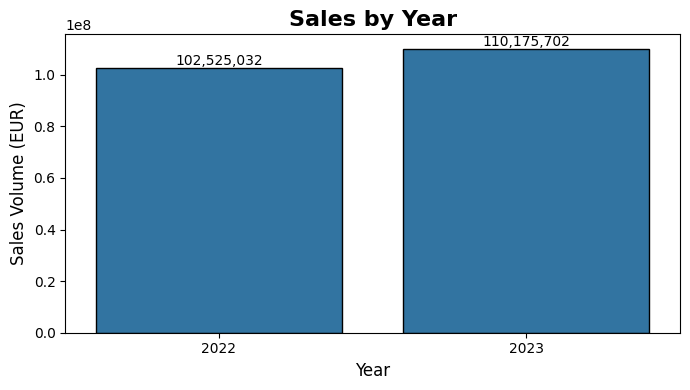

In [16]:
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(data=sales_by_year, x='Year', y='Sales', ax=ax, edgecolor='black')

for i, v in enumerate(sales_by_year['Sales']):
    ax.text(i, v + 1000, f'{v:,.0f}', ha='center', va='bottom')

ax.set_title("Sales by Year", fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Sales Volume (EUR)', fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
diff_year_sales = (sales_by_year['Sales'][1] - sales_by_year['Sales'][0])/sales_by_year['Sales'][0]
diff_year_sales = diff_year_sales * 100

print(f"From 2022 to 2023 the sales increased by {diff_year_sales.round(2)}%")

From 2022 to 2023 the sales increased by 7.46%


Observation: Sales in 2023 increased slightly compared to 2022, with a difference of 7.46%.

In [25]:
sales_by_category = df.groupby('Category')['Sales Volume in Eur'].sum().reset_index(name="Sales")
sales_by_category = sales_by_category.sort_values(by="Sales", ascending=False)

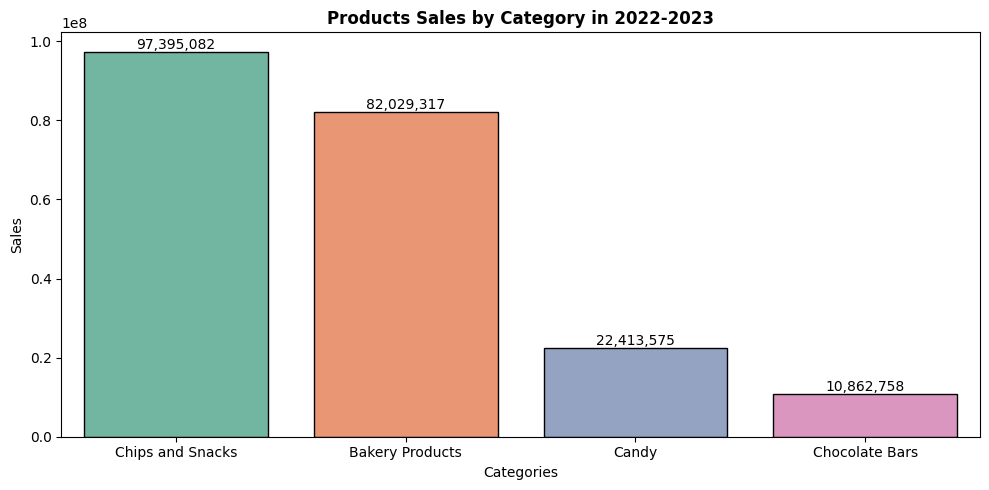

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_palette("Set2")
sns.barplot(sales_by_category, x='Category', y='Sales', hue="Category", edgecolor="black", ax=ax)


ax.set_title("Products Sales by Category in 2022-2023",fontweight='bold')
ax.set_xlabel('Categories')
ax.set_ylabel('Sales')

for i, v in enumerate(sales_by_category['Sales']):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.xticks(ha='center', fontsize=10)
plt.tight_layout()
plt.show()


Observation: Chips & Snacks and Bakery products are the categories that have the most sales.

## Questions

1) What are the top 10 candy items by sales volume in terms of weight in 2022 and 2023?

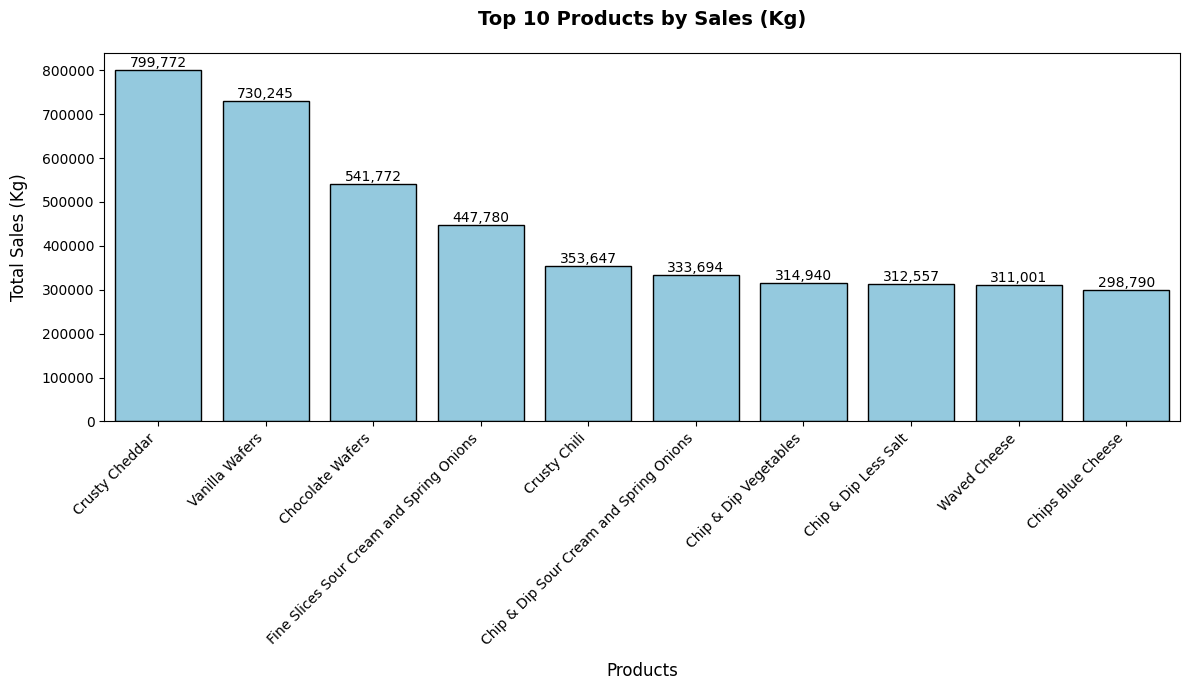

In [27]:
top_by_weight = df.groupby('Item')['Sales Volume in Kg'].sum().reset_index(name='Total Sales (Kg)')
top_by_weight = top_by_weight.sort_values(by='Total Sales (Kg)', ascending=False).head(10)


plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=top_by_weight,
    x='Item',
    y='Total Sales (Kg)',
    color='skyblue',
    edgecolor='black'
)
plt.title('Top 10 Products by Sales (Kg)', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Products', fontsize=12, labelpad=10)
plt.ylabel('Total Sales (Kg)', fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_by_weight['Total Sales (Kg)']):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()

plt.show()

2) What are the top 10 candy items by sales volume regarding money value in 2022 and 2023?

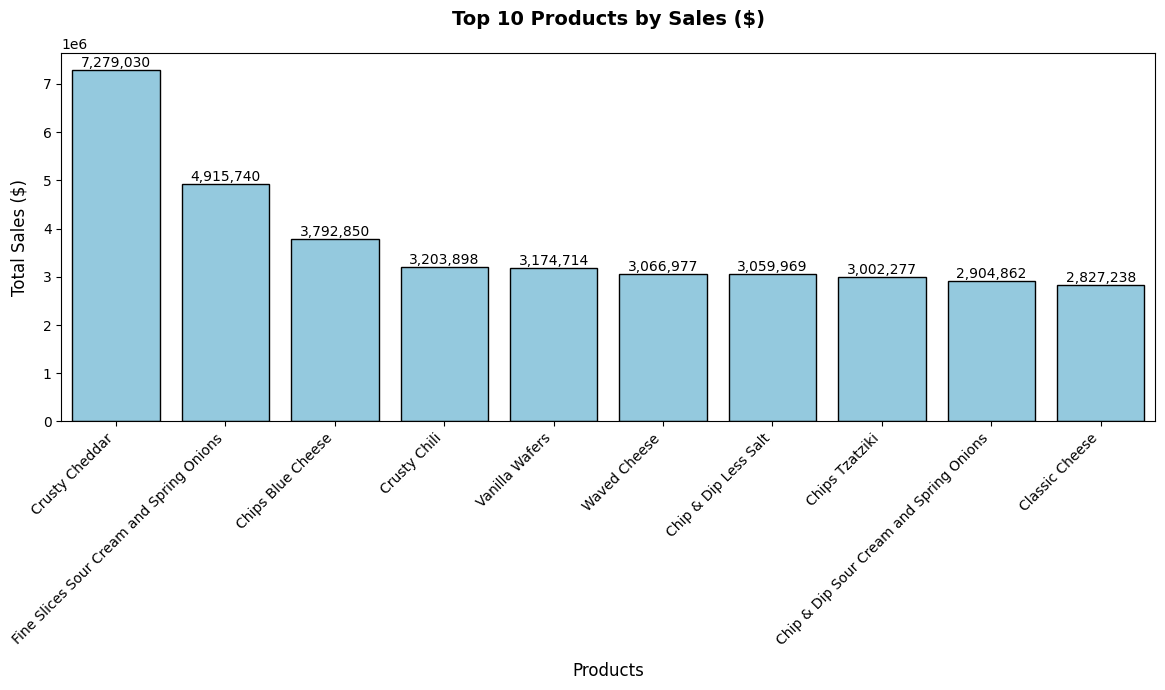

In [28]:
top_by_money = df.groupby('Item')['Sales Volume in Eur'].sum().reset_index(name='Total Sales ($)')
top_by_money = top_by_money.sort_values(by='Total Sales ($)', ascending=False).head(10)

plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=top_by_money,
    x='Item',
    y='Total Sales ($)',
    color='skyblue',
    edgecolor='black'
)
plt.title('Top 10 Products by Sales ($)', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Products', fontsize=12, labelpad=10)
plt.ylabel('Total Sales ($)', fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_by_money['Total Sales ($)']):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()

plt.show()

3)What is the candies sales volume in terms of weight trend by month from 2022 to 2023?

In [29]:
candies_df = df[df['Category'] == 'Candy']

candies_sales_trend = candies_df.groupby(['Year', 'Month'])['Sales Volume in Kg'].sum().reset_index(name="Total Sales (Kg)")
candies_sales_trend = candies_sales_trend.sort_values(by=['Year', 'Month'])

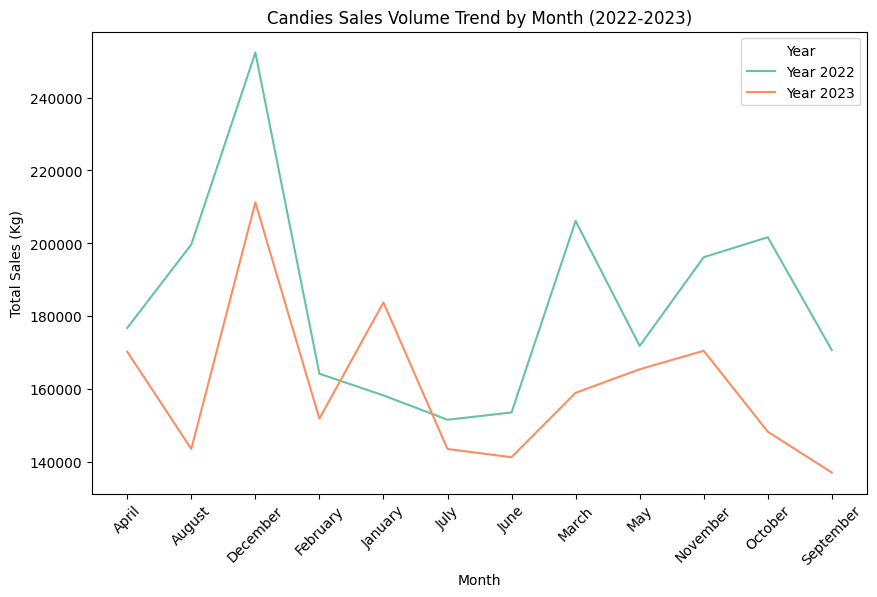

In [166]:
plt.figure(figsize=(10, 6))
for year in candies_sales_trend['Year'].unique():
    sales_by_year = candies_sales_trend[candies_sales_trend['Year'] == year]
    plt.plot(sales_by_year['Month'], sales_by_year['Total Sales (Kg)'], label=f"Year {year}")

plt.xlabel('Month')
plt.ylabel('Total Sales (Kg)')
plt.title('Candies Sales Volume Trend by Month (2022-2023)')
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.show()

4) What manufacturer had the most sales volume in the euro dollar in 2022?

In [30]:
sales_2022 = df[df['Year'] == 2022]
sales_by_manufacturer = sales_2022.groupby('Manufacturer')['Sales Volume in Eur'].sum().reset_index(name="Sales").sort_values(by="Sales", ascending=False)
sales_by_manufacturer_filtered = sales_by_manufacturer[sales_by_manufacturer['Manufacturer'] != 'Others']
manufacturer_most_sales = sales_by_manufacturer_filtered[sales_by_manufacturer_filtered['Sales'] == sales_by_manufacturer_filtered['Sales'].max()]

# Formatear solo al mostrar, sin cambiar el tipo de datos en el DataFrame
manufacturer_most_sales_display = manufacturer_most_sales.copy()
manufacturer_most_sales_display['Sales'] = manufacturer_most_sales_display['Sales'].apply(lambda x: f"{x:,.2f}")

display(manufacturer_most_sales_display)


,Manufacturer,Sales
3,Royal Blends Group,"35,787,880.00"


5) What manufacturer had the fewest sales volume in weight in 2023

In [31]:
manufacturer_fewest_sales = sales_by_manufacturer_filtered[sales_by_manufacturer_filtered['Sales'] == sales_by_manufacturer_filtered['Sales'].min()]
manufacturer_fewest_sales_display = manufacturer_fewest_sales.copy()
manufacturer_fewest_sales_display['Sales'] = manufacturer_fewest_sales_display['Sales'].apply(lambda x: f"{x:,.2f}")
display(manufacturer_fewest_sales_display)

,Manufacturer,Sales
0,Elite Sweets,"2,004,930.00"


6) Which package type of candy is the most popular to sell by weight?

In [32]:
package_by_weight = df.groupby('Package Type')['Sales Volume in Kg'].sum().reset_index(name="Sales(kg)").sort_values(by="Sales(kg)", ascending=False)
most_popular_package = package_by_weight[package_by_weight['Sales(kg)'] == package_by_weight['Sales(kg)'].max()]
most_popular_package_display = most_popular_package.copy()
most_popular_package_display['Sales(kg)'] = most_popular_package_display['Sales(kg)'].apply(lambda x: f"{x:,.2f}")
display(most_popular_package_display)


,Package Type,Sales(kg)
0,Bag,"11,229,203.00"


7) Which candy category is the most popular to sell by revenue?

In [33]:
most_popular_category = df.groupby('Category')['Sales Volume in Eur'].sum().reset_index().sort_values(by='Sales Volume in Eur', ascending=False).head(1)
most_popular_category_display = most_popular_category.copy()
most_popular_category_display['Sales Volume in Eur'] = most_popular_category_display['Sales Volume in Eur'].apply(lambda x: f"{x:,.2f}")
display(most_popular_category_display)

,Category,Sales Volume in Eur
2,Chips and Snacks,"97,395,082.50"


8) Which candy brand sold the most chips in 2022?

In [34]:
chips_df = df[(df['Product Type'] == "Chips") & (df['Year'] == 2022)]
most_chips_brand = chips_df.groupby('Brand')['Sales Volume in Kg'].sum().reset_index(name='Sales(kg)').sort_values(by='Sales(kg)', ascending=False)
most_chips_brand_display = most_chips_brand.copy()
most_chips_brand_display['Sales(kg)'] = most_chips_brand_display['Sales(kg)'].apply(lambda x: f"{x:,.2f}")
display(most_chips_brand_display.head(1))

,Brand,Sales(kg)
38,Land Corp.,"2,304,910.00"


9. Which candy brand sold the most chocolate-related candies in 2023?

In [35]:
chocolate_df = df[(df['Year'] == 2023) & (df['Product Type'].isin(['Milk Chocolate', 'Dark Chocolate', 'Chocolates','White Chocolate']))]
most_chocolate_brand = chocolate_df.groupby('Brand')['Sales Volume in Kg'].sum().reset_index(name='Sales(kg)').sort_values(by='Sales(kg)', ascending=False)
most_chocolate_brand_display = most_chocolate_brand.copy()
most_chocolate_brand_display['Sales(kg)'] = most_chocolate_brand_display['Sales(kg)'].apply(lambda x: f"{x:,.2f}")
display(most_chocolate_brand_display.head(1))

,Brand,Sales(kg)
26,Cascade Confectionery,"229,317.00"


10) What is the most profitable distribution channel to sell candies?

In [36]:
best_distribution_channel = df.groupby('Distribution Channel')['Sales Volume in Eur'].sum().reset_index(name="Sales($)").sort_values(by="Sales($)", ascending=False)
best_distribution_channel_display = best_distribution_channel.copy()
best_distribution_channel_display['Sales($)'] = best_distribution_channel_display['Sales($)'].apply(lambda x: f"{x:,.2f}")
display(best_distribution_channel_display)

,Distribution Channel,Sales($)
0,Small and Specialty Stores,"170,295,545.20"
1,Supermarket Chains,"42,405,188.10"
